In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
from cellpose import models,utils,io
import glob, os
from czifile import CziFile

# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(model_type='cyto', gpu=True)

>>>> using GPU


In [6]:
# list of files
# direc = 'C://Users/gloss/Desktop'
# direc = 'D:/INMED/CFOS/Images/TEST'
direc = 'C:/Users/cavalieri/Desktop/cellpose_test'
os.chdir(direc)
files = glob.glob('*.czi')

imgs = [None] * len(files)
for ind,f in enumerate(files):
    with CziFile(f) as czi:
        image = czi.asarray()
    imgs[ind] = np.squeeze(image)
    
nimg = len(imgs)

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended)
# diameter can be a list or a single number for all images

for ind, img in enumerate(imgs):
    imgs_tdt[ind] = img[1,:,:,:] #select one channel

In [10]:
diam_est = 15
masks, flows, styles, diams = model.eval(imgs_tdt, diameter=diam_est, channels=channels, do_3D=True)

multi-stack tiff read in as having 7 planes 1 channels
processing 3 image(s)


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


 running XY (512, 512) 





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [03:49<00:00, 32.72s/it]

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]


 running XZ (7, 512) 





 13%|██████████▍                                                                      | 66/512 [04:11<27:46,  3.74s/it]


 26%|████████████████████▋                                                           | 132/512 [08:19<24:14,  3.83s/it]


 39%|██████████████████████████████▉                                                 | 198/512 [12:25<19:34,  3.74s/it]


 52%|█████████████████████████████████████████▎                                      | 264/512 [16:32<15:24,  3.73s/it]


 64%|███████████████████████████████████████████████████▌                            | 330/512 [20:38<11:19,  3.73s/it]


 77%|█████████████████████████████████████████████████████████████▉                  | 396/512 [24:44<07:13,  3.74s/it]


 90%|████████████████████████████████████████████████████████████████████████▏       | 462/512 [28:51<03:06,  3.73s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [31:57<00:00,  3.75s/it]

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]


 running YZ (7, 512) 





 13%|██████████▍                                                                      | 66/512 [04:06<27:47,  3.74s/it]


 26%|████████████████████▋                                                           | 132/512 [08:12<23:38,  3.73s/it]


 39%|██████████████████████████████▉                                                 | 198/512 [12:18<19:32,  3.74s/it]


 52%|█████████████████████████████████████████▎                                      | 264/512 [16:25<15:27,  3.74s/it]


 64%|███████████████████████████████████████████████████▌                            | 330/512 [20:31<11:20,  3.74s/it]


 77%|█████████████████████████████████████████████████████████████▉                  | 396/512 [24:37<07:12,  3.73s/it]


 90%|████████████████████████████████████████████████████████████████████████▏       | 462/512 [28:43<03:06,  3.73s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [31:49<00:00,  3.73s/it]


flows computed 4056.52s
dynamics computed 4066.42s
masks computed 4067.83s


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


 running XY (512, 512) 





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [03:32<00:00, 30.33s/it]

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]


 running XZ (7, 512) 





 13%|██████████▍                                                                      | 66/512 [04:06<27:43,  3.73s/it]


 26%|████████████████████▋                                                           | 132/512 [08:12<23:36,  3.73s/it]


 39%|██████████████████████████████▉                                                 | 198/512 [12:18<19:29,  3.72s/it]


 52%|█████████████████████████████████████████▎                                      | 264/512 [16:24<15:22,  3.72s/it]


 64%|███████████████████████████████████████████████████▌                            | 330/512 [20:30<11:17,  3.72s/it]


 77%|█████████████████████████████████████████████████████████████▉                  | 396/512 [24:36<07:11,  3.72s/it]


 90%|████████████████████████████████████████████████████████████████████████▏       | 462/512 [28:42<03:06,  3.73s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [31:49<00:00,  3.73s/it]

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]


 running YZ (7, 512) 





 13%|██████████▍                                                                      | 66/512 [04:06<27:42,  3.73s/it]


 26%|████████████████████▋                                                           | 132/512 [08:11<23:36,  3.73s/it]


 39%|██████████████████████████████▉                                                 | 198/512 [12:17<19:29,  3.73s/it]


 52%|█████████████████████████████████████████▎                                      | 264/512 [16:24<15:24,  3.73s/it]


 64%|███████████████████████████████████████████████████▌                            | 330/512 [20:30<11:18,  3.73s/it]


 77%|█████████████████████████████████████████████████████████████▉                  | 396/512 [24:36<07:12,  3.73s/it]


 90%|████████████████████████████████████████████████████████████████████████▏       | 462/512 [28:42<03:06,  3.73s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [31:49<00:00,  3.73s/it]


flows computed 4031.19s
dynamics computed 4041.53s
masks computed 4042.86s


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


 running XY (512, 512) 





100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [03:32<00:00, 30.31s/it]

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]


 running XZ (7, 512) 





 13%|██████████▍                                                                      | 66/512 [04:06<27:47,  3.74s/it]


 26%|████████████████████▋                                                           | 132/512 [08:13<23:39,  3.73s/it]


 39%|██████████████████████████████▉                                                 | 198/512 [12:19<19:31,  3.73s/it]


 52%|█████████████████████████████████████████▎                                      | 264/512 [16:25<15:24,  3.73s/it]


 64%|███████████████████████████████████████████████████▌                            | 330/512 [20:32<11:19,  3.73s/it]


 77%|█████████████████████████████████████████████████████████████▉                  | 396/512 [24:38<07:12,  3.73s/it]


 90%|████████████████████████████████████████████████████████████████████████▏       | 462/512 [28:44<03:06,  3.73s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [31:51<00:00,  3.73s/it]

  0%|                                                                                          | 0/512 [00:00<?, ?it/s]


 running YZ (7, 512) 





 13%|██████████▍                                                                      | 66/512 [04:06<27:44,  3.73s/it]


 26%|████████████████████▋                                                           | 132/512 [08:12<23:37,  3.73s/it]


 39%|██████████████████████████████▉                                                 | 198/512 [12:18<19:31,  3.73s/it]


 52%|█████████████████████████████████████████▎                                      | 264/512 [16:24<15:23,  3.72s/it]


 64%|███████████████████████████████████████████████████▌                            | 330/512 [20:30<11:18,  3.73s/it]


 77%|█████████████████████████████████████████████████████████████▉                  | 396/512 [24:37<07:12,  3.73s/it]


 90%|████████████████████████████████████████████████████████████████████████▏       | 462/512 [28:43<03:06,  3.72s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 512/512 [31:50<00:00,  3.73s/it]


flows computed 4033.75s
dynamics computed 4044.39s
masks computed 4045.80s


100%|████████████████████████████████████████████████████████████████████████████████| 3/3 [3:22:38<00:00, 4052.80s/it]


In [38]:
# save_direc = 'C://Users/gloss/Desktop/TEST'
# os.chdir(save_direc)


[   0  264  228  132  108  144   12    0    0    0    0   36   36    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    1    4    5    8
   11   14   15   18   24   29   34   41   44   45   44   46   45   45
   42   42   39   36   32   23   16   28  156  117  156   91   26    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0   10   12
   16   10   10   16   80   64   80   32   80   80   96   80   80   64
   48   16    0    0    0    0    0    0   30  120  150  153  107   46
    0    0    0  115  125  150  200  250  275  350  475  425  150   75
  150  100  125  200  200  125  150  125  100   75   25    0    0    0
    0 

In [48]:
# io.masks_flows_to_seg(chan_to_analyse, masks, flows[0], diams, files[ind], channels=0)
for ind,img in enumerate(imgs_tdt):
#     io.masks_flows_to_seg(img, masks[ind], flows[ind], diams[ind], files[ind], channels= [0,0])
    io.save_to_png(img, masks[ind], flows[ind], files[ind])

ValueError: cannot save 3D outputs as PNG

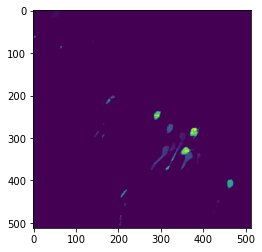

In [47]:
plt.imshow(np.squeeze(np.mean(masks[0],0)))